In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train=pd.read_csv('matches.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 18 columns):
id                 577 non-null int64
season             577 non-null int64
city               570 non-null object
date               577 non-null object
team1              577 non-null object
team2              577 non-null object
toss_winner        577 non-null object
toss_decision      577 non-null object
result             577 non-null object
dl_applied         577 non-null int64
winner             574 non-null object
win_by_runs        577 non-null int64
win_by_wickets     577 non-null int64
player_of_match    574 non-null object
venue              577 non-null object
umpire1            577 non-null object
umpire2            577 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 54.1+ KB


In [3]:
train.dtypes

id                   int64
season               int64
city                object
date                object
team1               object
team2               object
toss_winner         object
toss_decision       object
result              object
dl_applied           int64
winner              object
win_by_runs          int64
win_by_wickets       int64
player_of_match     object
venue               object
umpire1             object
umpire2             object
umpire3            float64
dtype: object

In [4]:
train.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,577.000000,577.000000,577.000000,577.000000,577.000000,0.0
mean,289.000000,2012.029463,0.025997,13.715771,3.363951,NaN
std,166.709828,2.486247,0.159263,23.619282,3.416049,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,145.000000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,289.000000,2012.000000,0.000000,0.000000,3.000000,NaN
75%,433.000000,2014.000000,0.000000,20.000000,6.000000,NaN
max,577.000000,2016.000000,1.000000,144.000000,10.000000,NaN


In [5]:
train[pd.isnull(train['winner'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
241,242,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
486,487,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
511,512,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN


In [6]:
train['winner'].fillna('Draw',inplace=True)

In [7]:
train.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW'],inplace=True)

encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Draw':14}}
train.replace(encode, inplace=True)
train.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,2,3,3,field,normal,0,2,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,5,9,5,bat,normal,0,5,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN


In [8]:
train[pd.isnull(train['city'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
402,403,2014,NaN,2014-04-19,1,3,3,field,normal,0,3,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
403,404,2014,NaN,2014-04-19,2,7,2,bat,normal,0,7,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
407,408,2014,NaN,2014-04-23,5,6,6,field,normal,0,5,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
409,410,2014,NaN,2014-04-25,10,7,10,bat,normal,0,10,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
410,411,2014,NaN,2014-04-25,1,5,1,bat,normal,0,5,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
415,416,2014,NaN,2014-04-28,3,9,9,field,normal,0,9,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
417,418,2014,NaN,2014-04-30,10,1,1,field,normal,0,10,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [9]:
train['city'].fillna('Dubai',inplace=True)
train.describe()

,id,season,team1,team2,toss_winner,dl_applied,winner,win_by_runs,win_by_wickets,umpire3
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,0.0
mean,289.000000,2012.029463,5.417678,5.481802,5.365685,0.025997,5.218371,13.715771,3.363951,NaN
std,166.709828,2.486247,3.281985,3.291946,3.255295,0.159263,3.196267,23.619282,3.416049,NaN
min,1.000000,2008.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,NaN
25%,145.000000,2010.000000,3.000000,3.000000,3.000000,0.000000,2.000000,0.000000,0.000000,NaN
50%,289.000000,2012.000000,5.000000,5.000000,5.000000,0.000000,5.000000,0.000000,3.000000,NaN
75%,433.000000,2014.000000,8.000000,7.000000,7.000000,0.000000,7.000000,20.000000,6.000000,NaN
max,577.000000,2016.000000,13.000000,13.000000,13.000000,1.000000,14.000000,144.000000,10.000000,NaN


In [10]:
train.info

<bound method DataFrame.info of       id  season           city        date  team1  team2  toss_winner  \
0      1    2008      Bangalore  2008-04-18      2      3            3   
1      2    2008     Chandigarh  2008-04-19      5      9            5   
2      3    2008          Delhi  2008-04-19      6      7            6   
3      4    2008         Mumbai  2008-04-20      1      3            1   
4      5    2008        Kolkata  2008-04-20      4      2            4   
5      6    2008         Jaipur  2008-04-21      9      6            9   
6      7    2008      Hyderabad  2008-04-22      4      7            4   
7      8    2008        Chennai  2008-04-23      5      1            1   
8      9    2008      Hyderabad  2008-04-24      4      6            6   
9     10    2008     Chandigarh  2008-04-25      9      1            1   
10    11    2008      Bangalore  2008-04-26      3      6            6   
11    12    2008        Chennai  2008-04-26      2      5            2   
12    

In [11]:
dict=encode['winner']
print(dict['MI'])
print(list(dict.keys())[list(dict.values()).index(1)])

1
MI


In [12]:
train = train[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
train.head()

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,2,3,Bangalore,field,3,M Chinnaswamy Stadium,2
1,5,9,Chandigarh,bat,5,"Punjab Cricket Association Stadium, Mohali",5
2,6,7,Delhi,bat,6,Feroz Shah Kotla,7
3,1,3,Mumbai,bat,1,Wankhede Stadium,3
4,4,2,Kolkata,bat,4,Eden Gardens,2


In [13]:
df = pd.DataFrame(train)
df.describe()

,team1,team2,toss_winner,winner
count,577.000000,577.000000,577.000000,577.000000
mean,5.417678,5.481802,5.365685,5.218371
std,3.281985,3.291946,3.255295,3.196267
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,2.000000
50%,5.000000,5.000000,5.000000,5.000000
75%,8.000000,7.000000,7.000000,7.000000
max,13.000000,13.000000,13.000000,14.000000


In [14]:
train['toss_winner'].value_counts()

1     74
2     69
5     66
9     64
7     64
6     63
3     61
4     43
10    30
13    20
12     8
8      8
11     7
Name: toss_winner, dtype: int64

In [15]:
train['toss_winner'].value_counts()

1     74
2     69
5     66
9     64
7     64
6     63
3     61
4     43
10    30
13    20
12     8
8      8
11     7
Name: toss_winner, dtype: int64

In [16]:
temp1=df['toss_winner'].value_counts(sort=True)
temp2=df['winner'].value_counts(sort=True)
print("toss Winner")
for idx, val in temp1.iteritems():
    z=('{} -> {}'.format(list(dict.keys())[list(dict.values()).index(idx)],val))
    print(z)
print('No of match winners by each team')
for idx, val in temp2.iteritems():
    k=('{} -> {}'.format(list(dict.keys())[list(dict.values()).index(idx)],val))
    print(k)

toss Winner
MI -> 74
KKR -> 69
CSK -> 66
KXIP -> 64
DD -> 64
RR -> 63
RCB -> 61
DC -> 43
SRH -> 30
PW -> 20
KTK -> 8
GL -> 8
RPS -> 7
No of match winners by each team
MI -> 80
CSK -> 79
RCB -> 70
KKR -> 68
KXIP -> 63
RR -> 63
DD -> 56
SRH -> 34
DC -> 29
PW -> 12
GL -> 9
KTK -> 6
RPS -> 5
Draw -> 3


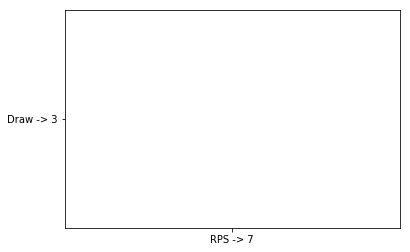

In [17]:
plt.plot([z],[k])

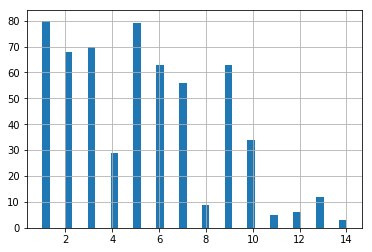

In [18]:
df['winner'].hist(bins=40)

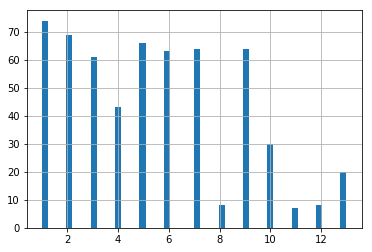

In [19]:
df['toss_winner'].hist(bins=50)

Text(0.5,1,'Probability of match winning by winning toss')

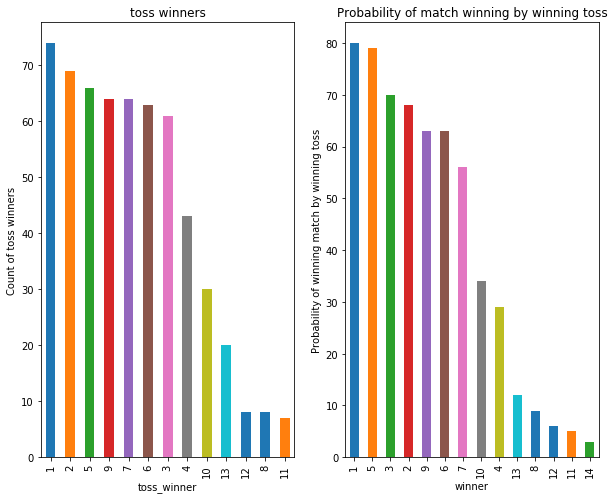

In [20]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('toss_winner')
ax1.set_ylabel('Count of toss winners')
ax1.set_title("toss winners")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('winner')
ax2.set_ylabel('Probability of winning match by winning toss')
ax2.set_title("Probability of match winning by winning toss")

In [21]:
train['toss_winner'].value_counts()

1     74
2     69
5     66
9     64
7     64
6     63
3     61
4     43
10    30
13    20
12     8
8      8
11     7
Name: toss_winner, dtype: int64

In [22]:
ct=pd.crosstab(train['winner'],train['toss_winner'],margins=True)
print(ct)

toss_winner   1   2   3   4   5   6   7  8   9  10  11  12  13  All
winner                                                             
1            41   4   3   4   4   6   7  0   5   3   0   0   3   80
2             2  38   4   3   4   3   3  0   6   4   1   0   0   68
3             5   1  33   3   4   2   5  1   6   3   1   2   4   70
4             0   1   4  19   1   1   0  0   2   0   0   1   0   29
5             5   6   3   2  42   8   4  0   3   3   0   0   3   79
6             2   4   2   3   2  34   6  0   6   2   0   0   2   63
7             6   4   3   5   3   2  28  0   3   0   0   0   2   56
8             0   0   1   0   0   0   1  6   0   0   1   0   0    9
9             8   5   4   3   4   3   6  1  26   1   1   0   1   63
10            3   3   3   0   1   2   2  0   4  14   0   0   2   34
11            1   0   0   0   0   0   0  0   1   0   3   0   0    5
12            0   2   0   0   0   0   0  0   0   0   0   4   0    6
13            1   1   0   1   1   1   1  0   2  

In [23]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

team1            0
team2            0
city             0
toss_decision    0
toss_winner      0
venue            0
winner           0
dtype: int64

In [24]:
df[pd.isnull(df['city'])]

,team1,team2,city,toss_decision,toss_winner,venue,winner


In [25]:
print('Now PREDICTIVE model')

Now PREDICTIVE model


In [26]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['city','toss_decision','venue']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes

team1            int64
team2            int64
city             int32
toss_decision    int32
toss_winner      int64
venue            int32
winner           int64
dtype: object

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

def classification_model(model, data, predictors, outcome):
    model.fit(data[predictors],data[outcome])
  
    predictions = model.predict(data[predictors])
  
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print('Accuracy : %s' % '{0:.3%}'.format(accuracy))

    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
        train_predictors = (data[predictors].iloc[train,:])
    
    train_target = data[outcome].iloc[train]
    
    model.fit(train_predictors, train_target)
    
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
    print('Cross-Validation Score : %s' % '{0:.3%}'.format(np.mean(error)))

    model.fit(data[predictors],data[outcome])

c:\users\akash\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [28]:
from sklearn.ensemble import RandomForestRegressor
outcome_var=['winner']
predictor_var = ['team1','team2','toss_winner']
model = LogisticRegression()
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 22.184%
Cross-Validation Score : 19.130%


c:\users\akash\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
df.head(3)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,2,3,2,1,3,14,2
1,5,9,6,0,5,22,5
2,6,7,9,0,6,8,7


In [30]:
model = RandomForestClassifier(n_estimators=100)
outcome_var = ['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)

c:\users\akash\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy : 89.601%


c:\users\akash\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Cross-Validation Score : 52.174%


c:\users\akash\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [31]:
team1='RCB'
team2='KKR'
toss_winner='RCB'
input=[dict[team1],dict[team2],'14',dict[toss_winner],'2','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dict.keys())[list(dict.values()).index(output)])

KKR


In [32]:
team1='DC'
team2='DD'
toss_winner='DC'
input=[dict[team1],dict[team2],'23',dict[toss_winner],'14','0']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print(list(dict.keys())[list(dict.values()).index(output)])

DD


In [33]:
imp_input = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(imp_input)

team2            0.252331
team1            0.218367
venue            0.170305
toss_winner      0.162235
city             0.159935
toss_decision    0.036827
dtype: float64


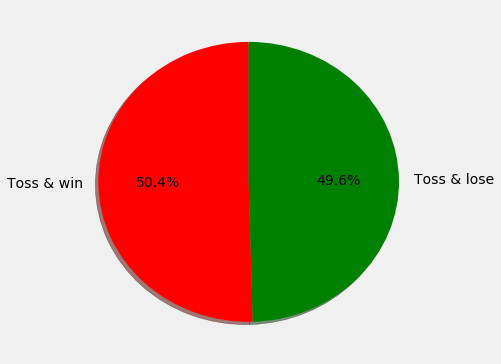

In [34]:
import matplotlib.pyplot as mlt
mlt.style.use('fivethirtyeight')
df_fil=df[df['toss_winner']==df['winner']]
slices=[len(df_fil),(577-len(df_fil))]
mlt.pie(slices,labels=['Toss & win','Toss & lose'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['r','g'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()

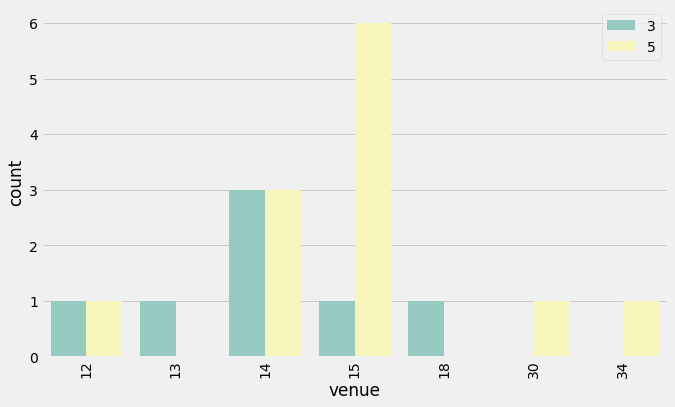

In [35]:
import seaborn as sns
team1=dict['CSK']
team2=dict['RCB']
mtemp=train[((train['team1']==team1)|(train['team2']==team1))&((train['team1']==team2)|(train['team2']==team2))]
sns.countplot(x='venue', hue='winner',data=mtemp,palette='Set3')
mlt.xticks(rotation='vertical')
leg = mlt.legend( loc = 'upper right')
fig=mlt.gcf()
fig.set_size_inches(10,6)
mlt.show()

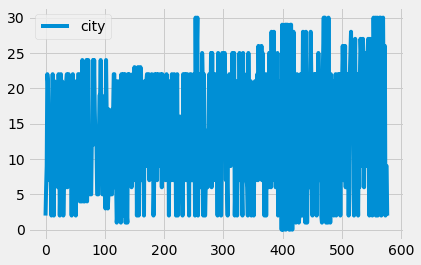

In [57]:
from matplotlib import style
style.use('fivethirtyeight')
df['city'].plot()
plt.legend()
plt.show()

In [63]:
df1=pd.DataFrame({'a':['winner'],'b':['toss_winner']})
df2=pd.DataFrame({'c':['city'],'d':['umpire1']})
concat=pd.concat([df1,df2])
print(concat)

        a            b     c        d
0  winner  toss_winner   NaN      NaN
0     NaN          NaN  city  umpire1
